In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Drop values with null values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#Drop median house value from orignal dataframe X to new dataframe y
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]


In [8]:
#Create a testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [9]:
#Join y data to X training data
train_data=X_train.join(y_train)

In [10]:
#Display data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10333,-117.75,33.83,14.0,2452.0,296.0,954.0,275.0,8.2375,<1H OCEAN,388300.0
9615,-120.49,37.28,11.0,1721.0,381.0,1708.0,373.0,1.9535,INLAND,57100.0
17832,-121.86,37.41,16.0,2938.0,589.0,1718.0,568.0,5.5073,<1H OCEAN,178900.0
6422,-118.00,34.13,24.0,2584.0,520.0,1869.0,503.0,3.2841,INLAND,167000.0
5133,-118.26,33.97,46.0,1295.0,351.0,1120.0,323.0,1.7121,<1H OCEAN,98200.0
...,...,...,...,...,...,...,...,...,...,...
10702,-117.70,33.60,26.0,2283.0,506.0,634.0,469.0,2.3774,<1H OCEAN,74300.0
14757,-117.04,32.55,15.0,2206.0,648.0,2511.0,648.0,1.6348,NEAR OCEAN,93200.0
10360,-117.67,33.57,18.0,1614.0,210.0,692.0,209.0,7.9294,<1H OCEAN,280300.0
18900,-122.26,38.11,52.0,793.0,216.0,505.0,194.0,1.9667,NEAR BAY,93800.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

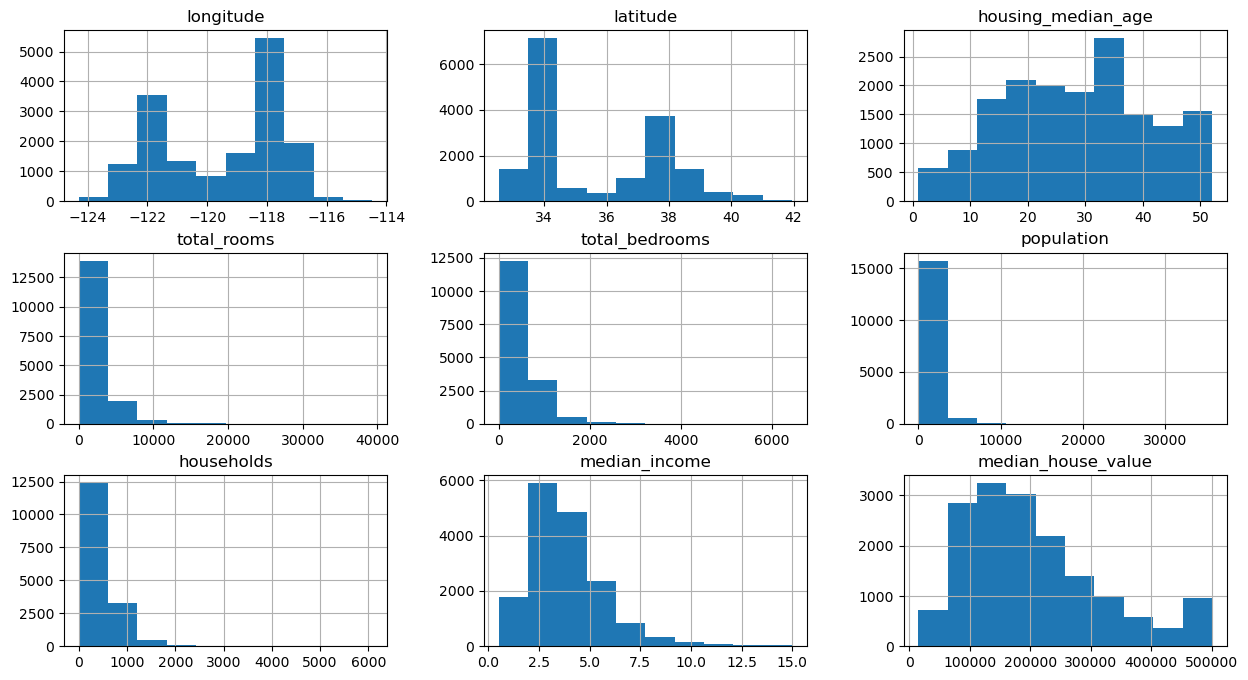

In [11]:
#Make histograms of data from different columns
train_data.hist(figsize=(15, 8))

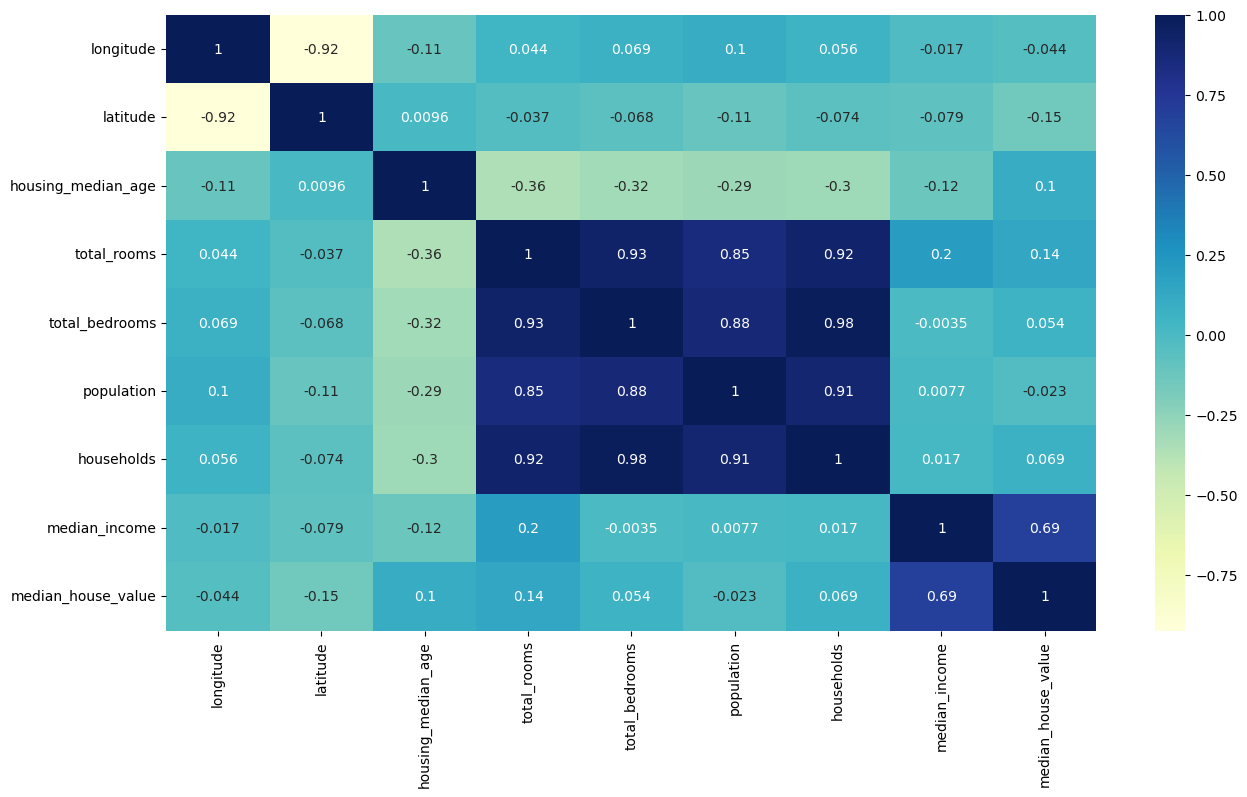

In [12]:
#Create a correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [13]:
#Count the distribution of selected columns
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

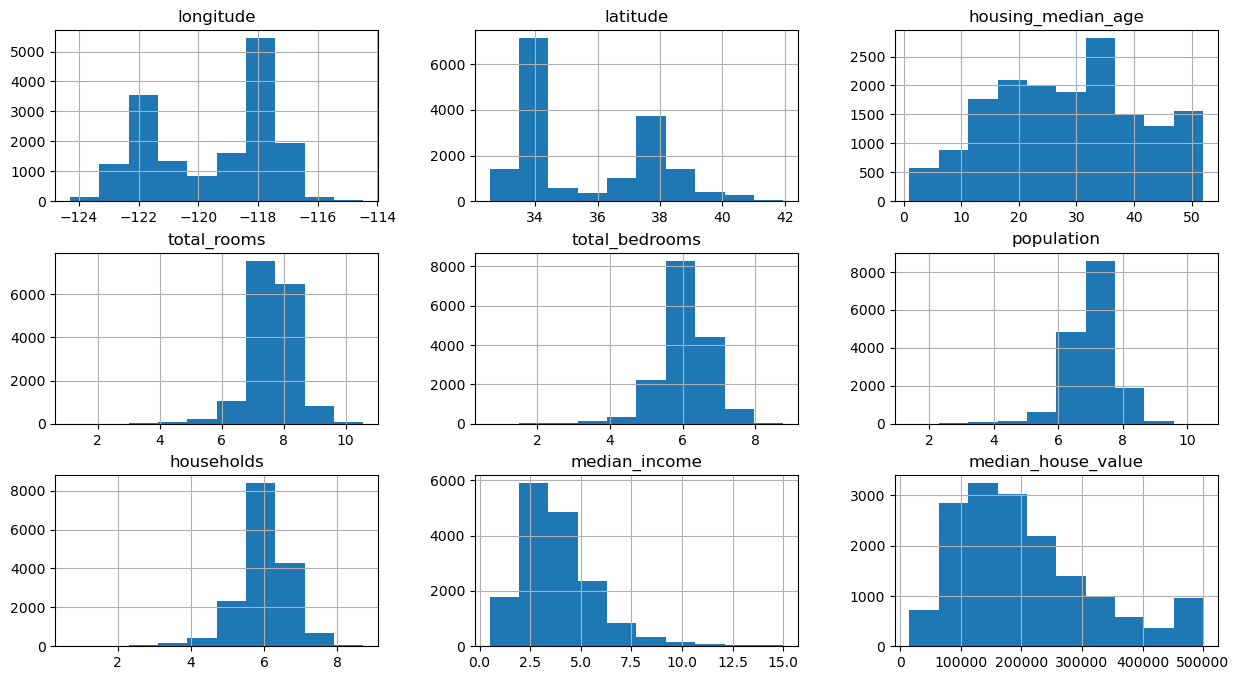

In [14]:
#Create histograms of training data
train_data.hist(figsize=(15,8))

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7228
INLAND        5206
NEAR OCEAN    2093
NEAR BAY      1815
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)



In [17]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10333,-117.75,33.83,14.0,7.805067,5.693732,6.861711,5.620401,8.2375,388300.0,1,0,0,0,0
9615,-120.49,37.28,11.0,7.451242,5.945421,7.443664,5.924256,1.9535,57100.0,0,1,0,0,0
17832,-121.86,37.41,16.0,7.985825,6.380123,7.449498,6.343880,5.5073,178900.0,1,0,0,0,0
6422,-118.00,34.13,24.0,7.857481,6.255750,7.533694,6.222576,3.2841,167000.0,0,1,0,0,0
5133,-118.26,33.97,46.0,7.167038,5.863631,7.021976,5.780744,1.7121,98200.0,1,0,0,0,0


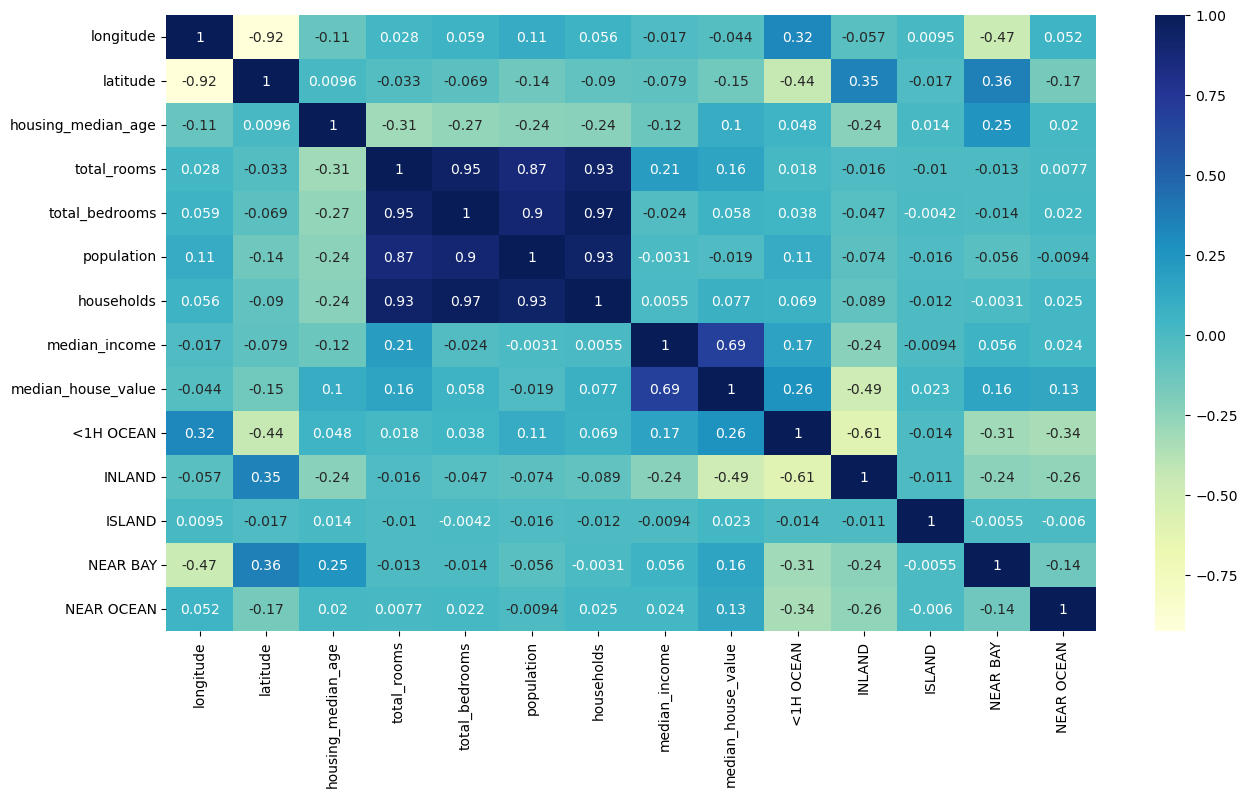

In [18]:
#Create correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

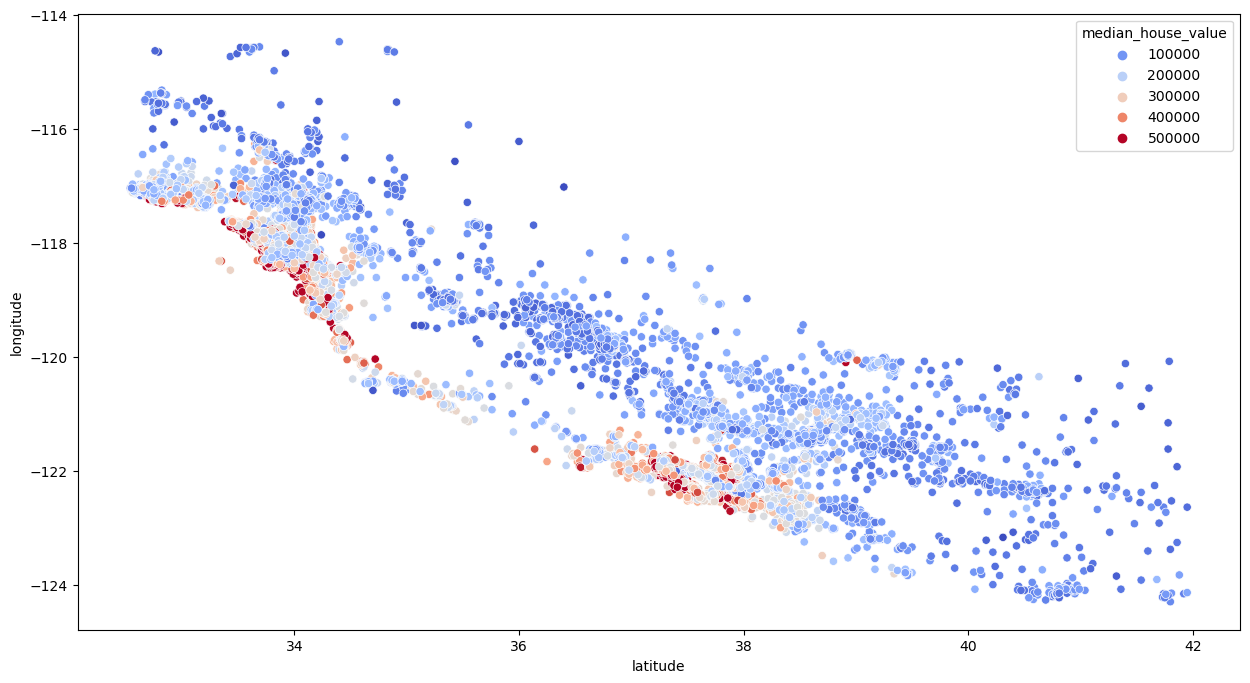

In [19]:
#Create scatterplot of median house values in California area
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
plt.show()

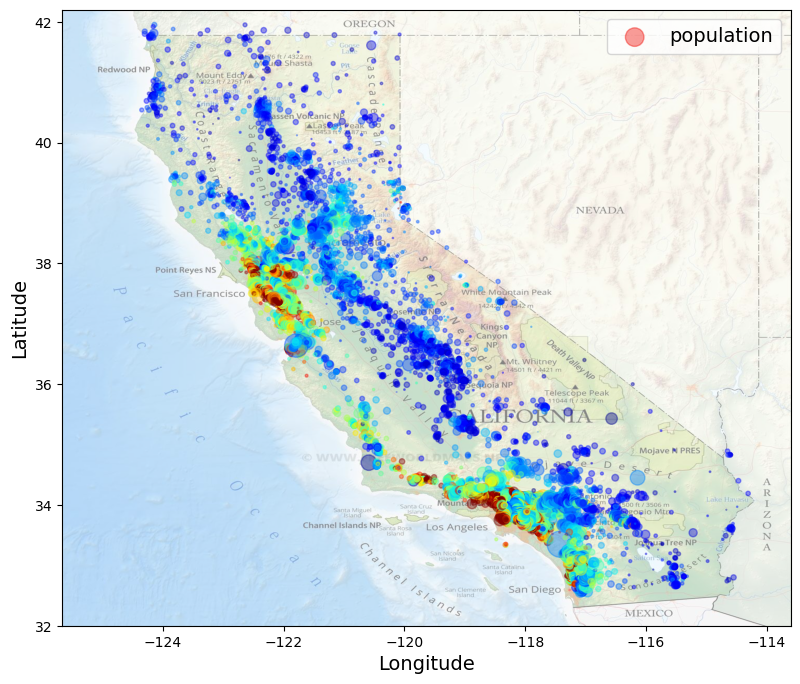

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from matplotlib import cm

housing = pd.read_csv('housing.csv')

#Create a map of median house value and population in California reagion
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing['population']/100, label="population", figsize=(13,8),
                  c="median_house_value", cmap=cm.get_cmap("jet"), colorbar=False)

california_img = mpimg.imread('california-map.jpg')
plt.imshow(california_img, extent=[-125.67, -113.6, 32.0, 42.2], alpha=0.5,
           cmap=cm.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [21]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<AxesSubplot:>

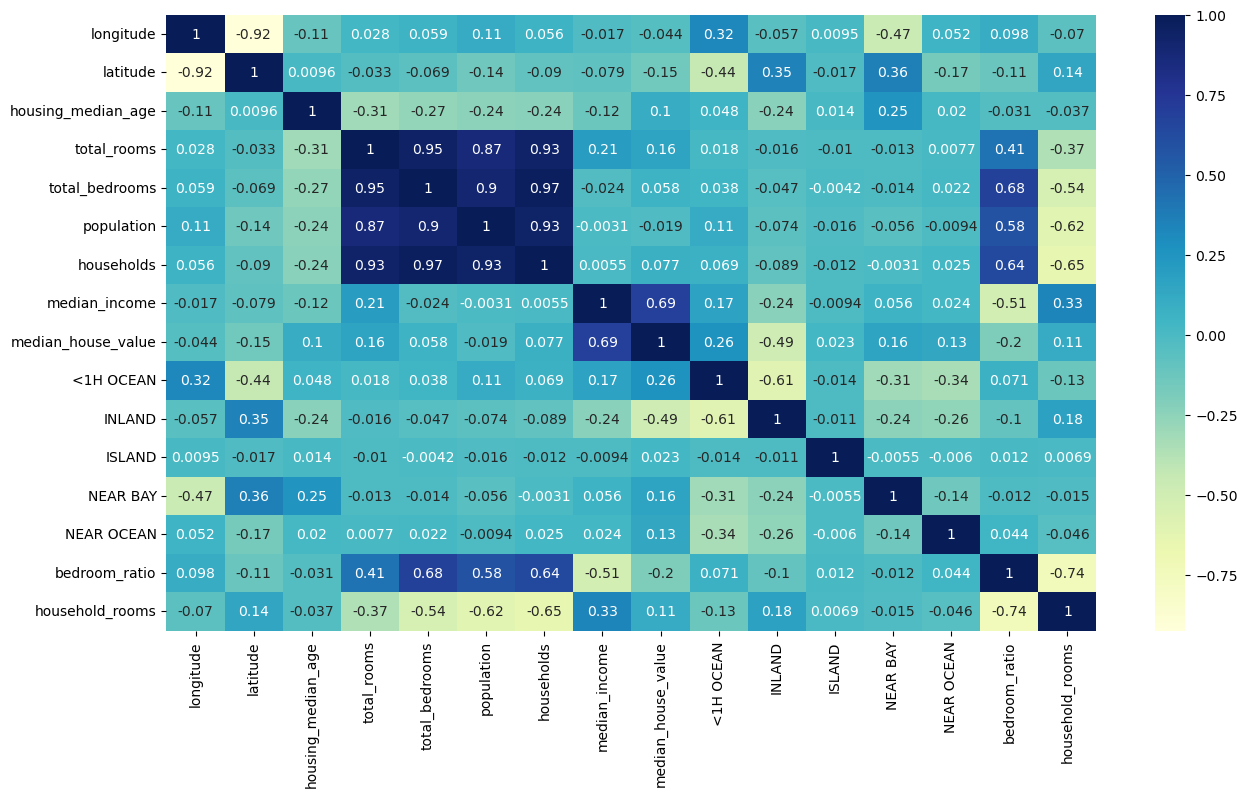

In [22]:
#Create a new correlation matrix 
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap = "YlGnBu")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
X_train_s=scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [24]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

test_data["bedroom_ratio"]=test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [25]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3758,-118.37,34.18,35.0,7.989560,6.678342,7.653020,6.616065,2.9228,177300.0,1,0,0,0,0,0.835884,1.207600
13305,-117.62,34.09,26.0,8.093157,6.390241,7.723120,6.340359,4.0139,132000.0,0,1,0,0,0,0.789586,1.276451
2791,-118.39,37.37,25.0,8.100465,6.715383,7.298445,6.647688,1.8325,105800.0,0,1,0,0,0,0.829012,1.218539
9343,-122.57,37.99,45.0,7.785305,6.054439,6.831954,5.993961,4.9674,320100.0,0,0,0,1,0,0.777675,1.298858
3938,-118.58,34.22,35.0,7.848153,6.091310,7.264730,6.150603,5.6345,228200.0,1,0,0,0,0,0.776146,1.275997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,-118.41,34.19,39.0,7.064759,5.493061,6.418365,5.513429,4.1429,200000.0,1,0,0,0,0,0.777530,1.281373
11387,-117.98,33.65,18.0,6.935370,5.332719,6.079933,5.198497,4.2159,211300.0,1,0,0,0,0,0.768916,1.334111
18729,-122.36,40.55,21.0,7.824446,6.146329,7.264730,6.220590,2.6513,113300.0,0,1,0,0,0,0.785529,1.257830
19987,-119.32,36.20,25.0,7.264030,5.509388,6.650279,5.402677,2.2262,64500.0,0,1,0,0,0,0.758448,1.344524


In [26]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"] 

In [27]:
X_test_s=scaler.transform(X_test)

In [28]:
#Count the regression score
reg.score(X_test_s, y_test)

0.6612847607497482

In [29]:
from sklearn.ensemble import RandomForestRegressor

#Implement RandomForest
forest = RandomForestRegressor()

#Fit the training data to model
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [30]:
#Count score for random forest. Default depth is 100 trees
forest.score(X_test_s,y_test)

0.8138649766691521

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth": [None, 4,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,
                        scoring="neg_mean_squared_error",
                        return_train_score= True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [34]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8151931894315707

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

predicted_prices = forest.predict(X_test_scaled)
price_comparison = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': predicted_prices
})

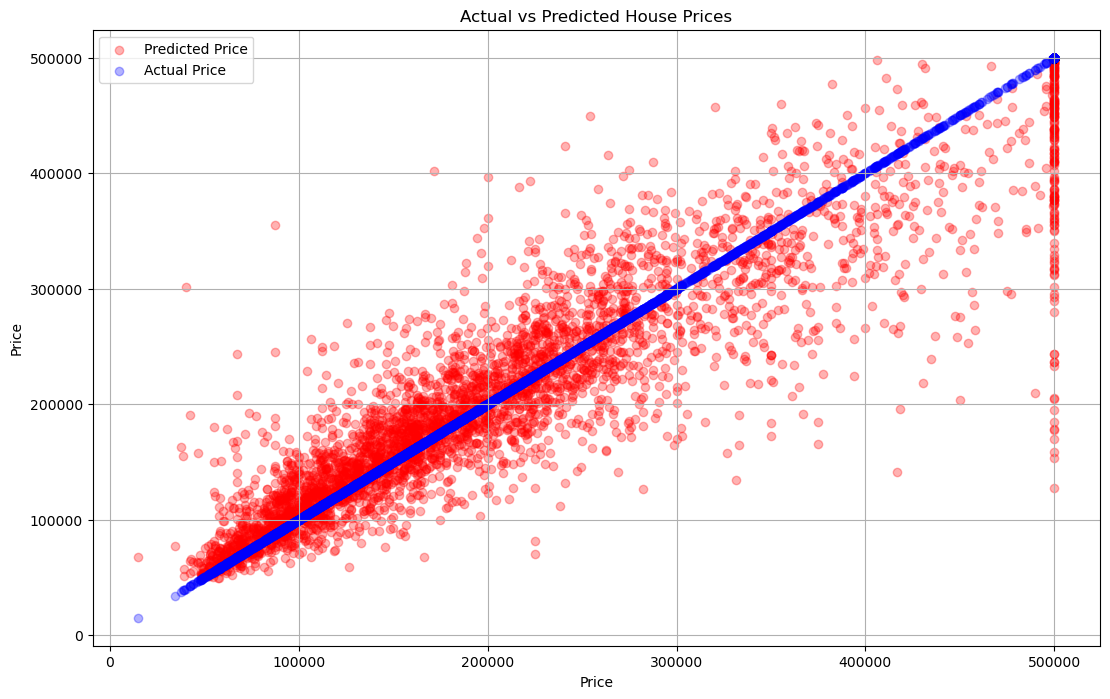

In [36]:
plt.figure(figsize=(13, 8))
plt.scatter(price_comparison['Actual Price'], price_comparison['Predicted Price'], color='red', alpha=0.3, label='Predicted Price')
plt.scatter(price_comparison['Actual Price'], price_comparison['Actual Price'], color='blue', alpha=0.3, label='Actual Price')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()